In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing train datasets

In [38]:
X_train = pd.read_csv("../raw_data/train_x.csv", delimiter=" ", index_col="Id")
y_train = pd.read_csv("../raw_data/train_y.csv", delimiter=" ", index_col="Id")

In [39]:
X_train.tail()

,Image_name,Title
Id,,
51295,0399176055.jpg,Extreme Prey
51296,0719816629.jpg,The Crime Writer's Guide to Police Practice an...
51297,0385353596.jpg,The Jezebel Remedy: A novel
51298,1475988559.jpg,Startup
51299,045147483X.jpg,Killer Takeout: A Key West Food Critic Mystery


In [101]:
y_train.head()

,Genre_id,Genre_name
Id,,
0,1,Biographies & Memoirs
1,4,Children's Books
2,10,Engineering & Transportation
3,9,Christian Books & Bibles
4,26,Sports & Outdoors


# Genres listing

In [25]:
y_train.Genre_name.nunique()

30

In [63]:
genre_dict = y_train.set_index('Genre_id')['Genre_name'].to_dict()

In [64]:
genre_dict

{1: 'Biographies & Memoirs',
 4: "Children's Books",
 10: 'Engineering & Transportation',
 9: 'Christian Books & Bibles',
 26: 'Sports & Outdoors',
 11: 'Health, Fitness & Dieting',
 16: 'Medical Books',
 23: 'Science & Math',
 29: 'Travel',
 2: 'Business & Money',
 7: 'Cookbooks, Food & Wine',
 19: 'Politics & Social Sciences',
 8: 'Crafts, Hobbies & Home',
 21: 'Religion & Spirituality',
 15: 'Literature & Fiction',
 13: 'Humor & Entertainment',
 14: 'Law',
 6: 'Computers & Technology',
 28: 'Test Preparation',
 0: 'Arts & Photography',
 18: 'Parenting & Relationships',
 22: 'Romance',
 12: 'History',
 5: 'Comics & Graphic Novels',
 20: 'Reference',
 27: 'Teen & Young Adult',
 25: 'Self-Help',
 3: 'Calendars',
 24: 'Science Fiction & Fantasy',
 17: 'Mystery, Thriller & Suspense'}

In [73]:
fiction = [4, 15, 22, 5, 27, 24, 17]

In [74]:
fiction_dict = {}

In [75]:
for genre in genre_dict.keys():
    if genre in fiction:
        fiction_dict[genre] = [genre_dict[genre], 1]
    else:
        fiction_dict[genre]= [genre_dict[genre], 0]

In [76]:
fiction_dict

{1: ['Biographies & Memoirs', 0],
 4: ["Children's Books", 1],
 10: ['Engineering & Transportation', 0],
 9: ['Christian Books & Bibles', 0],
 26: ['Sports & Outdoors', 0],
 11: ['Health, Fitness & Dieting', 0],
 16: ['Medical Books', 0],
 23: ['Science & Math', 0],
 29: ['Travel', 0],
 2: ['Business & Money', 0],
 7: ['Cookbooks, Food & Wine', 0],
 19: ['Politics & Social Sciences', 0],
 8: ['Crafts, Hobbies & Home', 0],
 21: ['Religion & Spirituality', 0],
 15: ['Literature & Fiction', 1],
 13: ['Humor & Entertainment', 0],
 14: ['Law', 0],
 6: ['Computers & Technology', 0],
 28: ['Test Preparation', 0],
 0: ['Arts & Photography', 0],
 18: ['Parenting & Relationships', 0],
 22: ['Romance', 1],
 12: ['History', 0],
 5: ['Comics & Graphic Novels', 1],
 20: ['Reference', 0],
 27: ['Teen & Young Adult', 1],
 25: ['Self-Help', 0],
 3: ['Calendars', 0],
 24: ['Science Fiction & Fantasy', 1],
 17: ['Mystery, Thriller & Suspense', 1]}

In [77]:
genre_df = pd.DataFrame.from_dict(fiction_dict, orient='index')
genre_df.head()

,0,1
1,Biographies & Memoirs,0
4,Children's Books,1
10,Engineering & Transportation,0
9,Christian Books & Bibles,0
26,Sports & Outdoors,0


In [78]:
genre_df = genre_df.rename(columns={
    genre_df.columns[0]: 'Genre_name',
    genre_df.columns[1]: 'is_fiction',
})

In [79]:
genre_df.head()

,Genre_name,is_fiction
1,Biographies & Memoirs,0
4,Children's Books,1
10,Engineering & Transportation,0
9,Christian Books & Bibles,0
26,Sports & Outdoors,0


In [80]:
genre_df[genre_df['is_fiction'] == 1]

,Genre_name,is_fiction
4,Children's Books,1
15,Literature & Fiction,1
22,Romance,1
5,Comics & Graphic Novels,1
27,Teen & Young Adult,1
24,Science Fiction & Fantasy,1
17,"Mystery, Thriller & Suspense",1


In [91]:
len(genre_df[genre_df['is_fiction'] == 0])

23

In [94]:
non_fiction_dict = {
    9: 'Religion & Spirituality', 
    21: 'Religion & Spirituality', 
    1: 'Biographies & Memoirs',
    29: 'Travel',
    13: 'Humor & Entertainment',
    0: 'Arts & Photography',
    3: 'Arts & Photography',
    26: 'Self-Help',
    11: 'Self-Help',
    2: 'Self-Help',
    7: 'Self-Help',
    8: 'Self-Help',
    18: 'Self-Help',
    25: 'Self-Help',
    10: 'Academic', 
    16: 'Academic', 
    23: 'Academic', 
    19: 'Academic', 
    14: 'Academic',
    6: 'Academic',
    28: 'Academic',
    12: 'Academic',
    20: 'Academic'
}

In [97]:
len(non_fiction_dict)

23

In [95]:
genre_df['non_fiction_umbrella'] = genre_df.index.map(non_fiction_dict)

In [106]:
genre_df

,Genre_name,is_fiction,non_fiction_umbrella
1,Biographies & Memoirs,0,Biographies & Memoirs
4,Children's Books,1,NaN
10,Engineering & Transportation,0,Academic
9,Christian Books & Bibles,0,Religion & Spirituality
26,Sports & Outdoors,0,Self-Help
11,"Health, Fitness & Dieting",0,Self-Help
16,Medical Books,0,Academic
23,Science & Math,0,Academic
29,Travel,0,Travel
2,Business & Money,0,Self-Help


# Checking class imbalance according to categories

In [112]:
y_train_with_umbrella = y_train[['Genre_id']].merge(genre_df, left_on='Genre_id', right_index=True).sort_index()
y_train_with_umbrella.head()

,Genre_id,Genre_name,is_fiction,non_fiction_umbrella
Id,,,,
0,1,Biographies & Memoirs,0,Biographies & Memoirs
1,4,Children's Books,1,NaN
2,10,Engineering & Transportation,0,Academic
3,9,Christian Books & Bibles,0,Religion & Spirituality
4,26,Sports & Outdoors,0,Self-Help


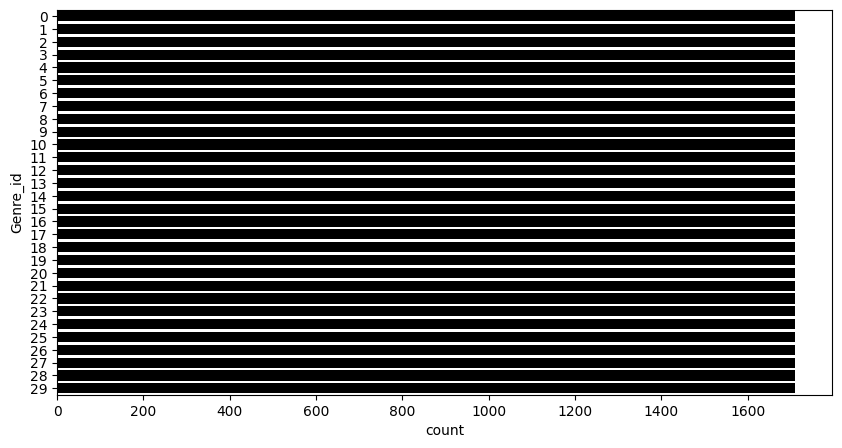

In [131]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Genre_id", data=y_train_with_umbrella, color='black');

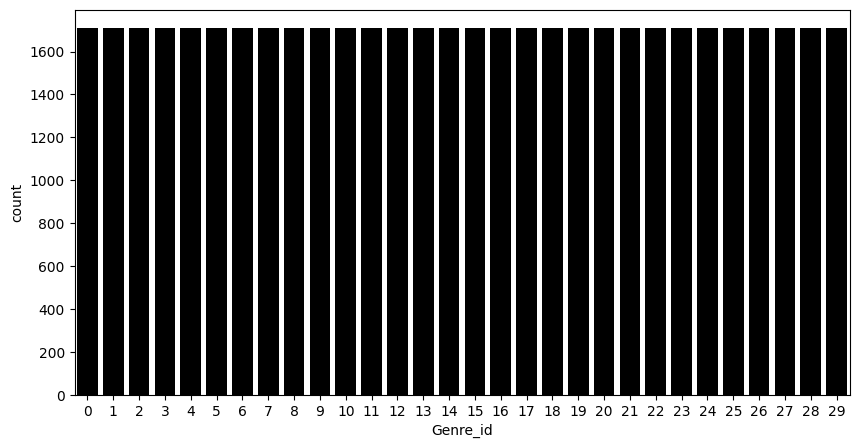

In [132]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Genre_id", data=y_train_with_umbrella, color='black');

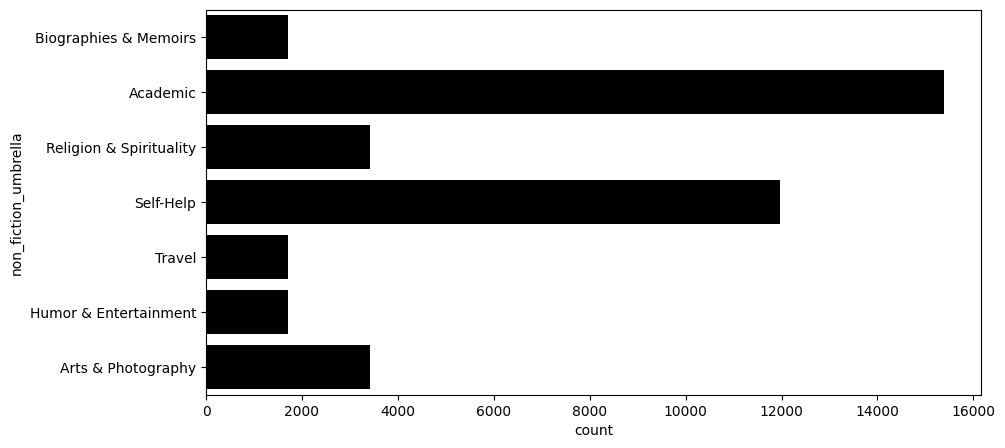

In [133]:
plt.figure(figsize=(10, 5))
sns.countplot(y="non_fiction_umbrella", data=y_train_with_umbrella, color='black');